In [3]:
import pandas as pd

In [31]:
data = pd.read_csv("cps_data.csv", encoding="utf-8")
data = data.drop(columns=["Product ID", "UDI","Type"])
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# 고장 유형
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# 각 고장 유형별 데이터프레임
twf_df = data[data["TWF"] == 1]
hdf_df = data[data["HDF"] == 1] 
pwf_df = data[data["PWF"] == 1]
osf_df = data[data["OSF"] == 1]
rnf_df = data[data["RNF"] == 1]

In [33]:
data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341


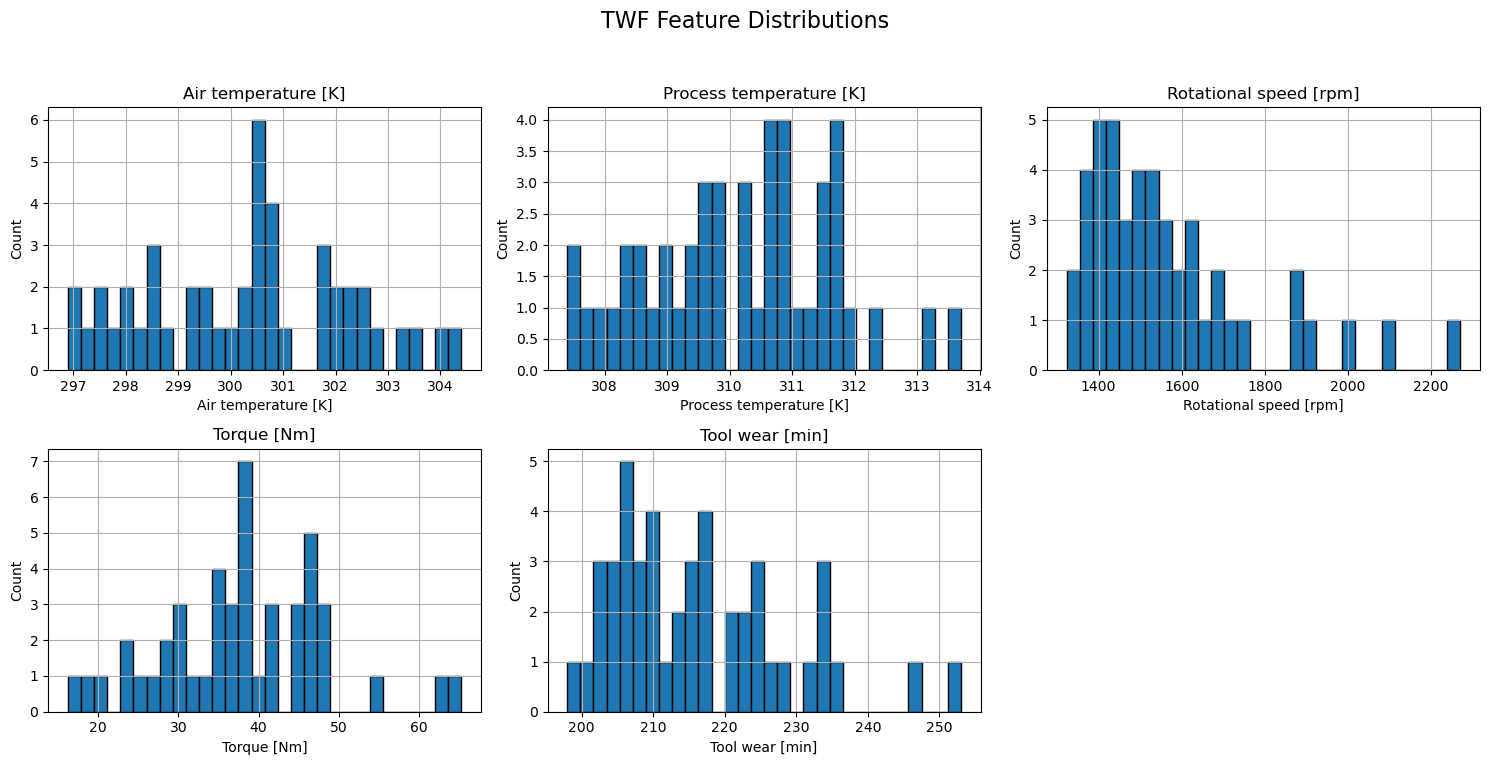

In [ ]:
import matplotlib.pyplot as plt


FEATURES = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
]


def plot_features(df, title_prefix=""):
    # 주어진 데이터프레임에서 5개 feature를 히스토그램으로 시각화
    plt.figure(figsize=(15, 8))

    for i, col in enumerate(FEATURES, start=1):
        if col not in df.columns:
            continue
        plt.subplot(2, 3, i)
        df[col].hist(bins=30, edgecolor="black")
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Count")

    plt.suptitle(f"{title_prefix} Feature Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_features(twf_df, title_prefix="TWF")
# plot_features(hdf_df, title_prefix="HDF = 1")
# plot_features(pwf_df, title_prefix="PWF = 1")
# plot_features(osf_df, title_prefix="OSF = 1")
# plot_features(rnf_df, title_prefix="RNF = 1")
